# Sparse Hebbian Learning: basics

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.

Here, we will show the basic operations that are implemented in this package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10
#matname = 'HAP_quantization'
homeo_method = 'HEH'
matname = 'autoencoder_' + homeo_method
homeo_params = dict(eta_homeo=0.05, alpha_homeo=0.02, C=5., nb_quant=128, P_cum=None)
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, homeo_method=homeo_method, homeo_params=homeo_params, verbose=verbose)

In [4]:
from shl_scripts.shl_experiments import SHL
shl = SHL(**opts)
data = shl.get_data(matname='autoencoder')

Extracting data..loading the data called : /tmp/data_cache/autoencoder_data
Data is of shape : (81920, 256) - done in 0.33s.


In [5]:
!ls -l {shl.data_cache}/{matname}*

-rw-r--r--  1 lolo  wheel  1260770 Feb  7 14:03 /tmp/data_cache/autoencoder_HEH_dico.pkl


In [6]:
!ls -l {shl.data_cache}/{matname}*

-rw-r--r--  1 lolo  wheel  1260770 Feb  7 14:03 /tmp/data_cache/autoencoder_HEH_dico.pkl


In [7]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (81920, 256)
average of patches =  -0.00019886110837833318  +/-  0.05942785266358504
average energy of data =  0.5953639765391074 +/- 0.5646953608649904


In [8]:
shl.do_precision

False

## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

loading the dico called : /tmp/data_cache/autoencoder_HEH_dico.pkl


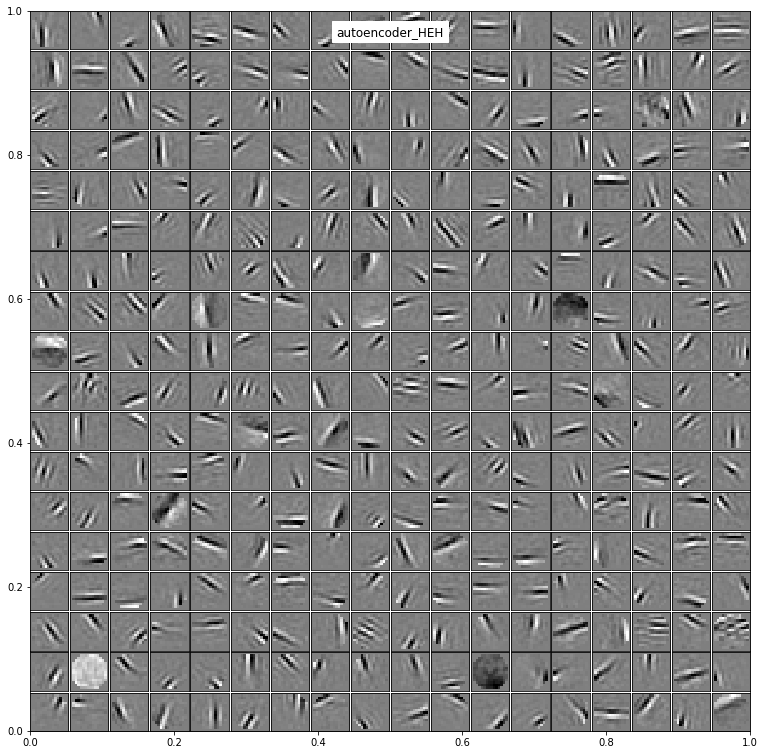

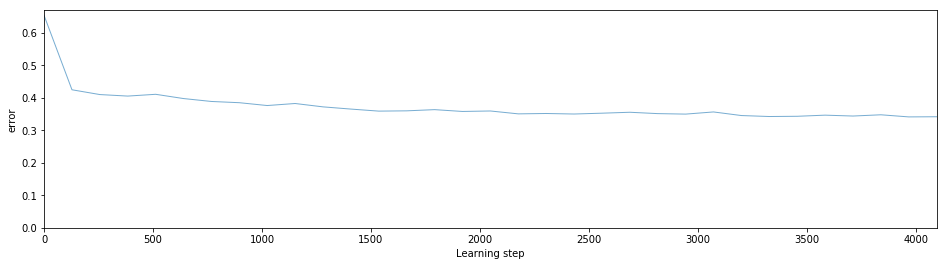

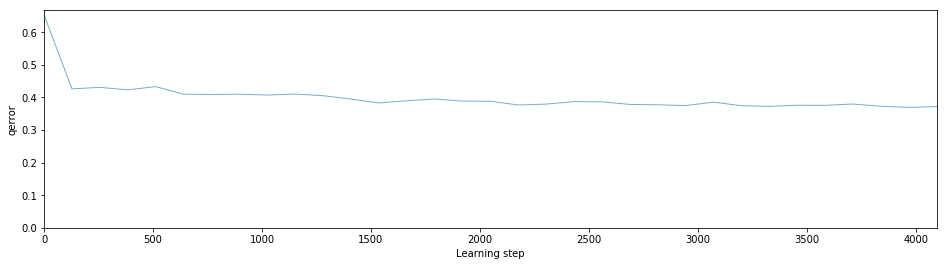

In [9]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_qerror']#, 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']

dico = shl.learn_dico(data=data, list_figures=list_figures, matname=matname)

In [10]:
print('size of dictionary = (number of filters, size of imagelets) = ', dico.dictionary.shape)
print('average of filters = ',  dico.dictionary.mean(axis=1).mean(), 
      '+/-',  dico.dictionary.mean(axis=1).std())
SE = np.sqrt(np.sum(dico.dictionary**2, axis=1))
print('average energy of filters = ', SE.mean(), '+/-', SE.std())

size of dictionary = (number of filters, size of imagelets) =  (324, 256)
average of filters =  3.834536964154693e-05 +/- 0.005092280020385613
average energy of filters =  1.0 +/- 9.127666885870573e-17


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (2048, 324)
average of codewords =  0.128284610871433
l0-sparseness of codewords =  0.0913990162037037  ~= l0/M = 0.09259259259259259
average energy of codewords =  0.6773303278459217
std of the average of individual patches =  0.01970775995370087
number of codes, size of reconstructed images =  (2048, 256)


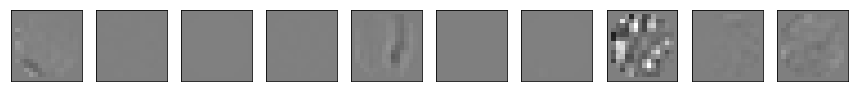

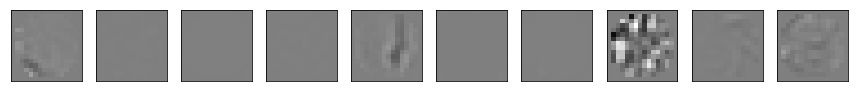

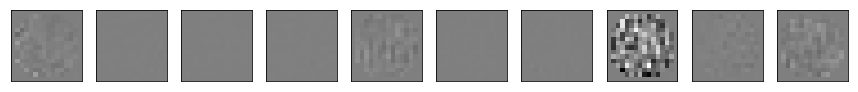

average of data patches =  -0.00019886110837833318 +/- 0.05942785266358504
average of residual patches =  -0.0005594941212336812 +/- 0.01786659908195062
median energy of data =  0.4872344024478701
average energy of data =  0.6038626787030209 +/- 0.5702483495978058
average error =  -0.0005594941212336812 +/- 0.28331939851742455
average energy of residual =  0.20866907006646618 +/- 0.1916439767056172
median energy of residual =  0.16981725802111539
average gain of coding =  3.353640918248609 +/- 1.4354689849669355
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (2048, 324)
average of codewords =  0.1282866471300191
l0-sparseness of codewords =  0.09140203028549383  ~= l0/M = 0.09259259259259259
average energy of codewords =  0.6771441580200652
std of the average of individual patches =  0.019715734347394008
number of codes, size of reconstructed images =  (2048, 256)


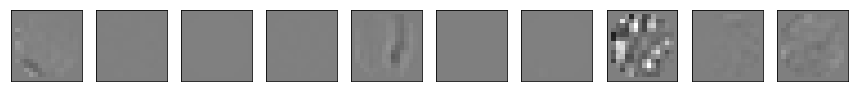

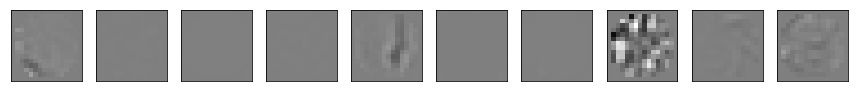

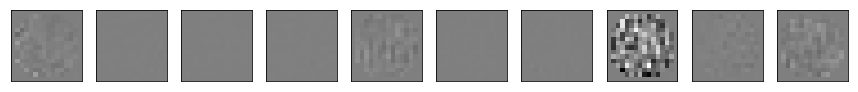

average of data patches =  -0.00019886110837833318 +/- 0.05942785266358504
average of residual patches =  -0.0005654831660147544 +/- 0.01785242495009681
median energy of data =  0.4872344024478701
average energy of data =  0.6038626787030209 +/- 0.5702483495978058
average error =  -0.0005654831660147544 +/- 0.2834138615123656
average energy of residual =  0.208701139701443 +/- 0.19174871826398254
median energy of residual =  0.16981725802111536
average gain of coding =  3.3534784645944007 +/- 1.4353699413192325
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (2048, 324)
average of codewords =  0.1281566099169976
l0-sparseness of codewords =  0.09127242476851852  ~= l0/M = 0.09259259259259259
average energy of codewords =  0.6776831677764842
std of the average of individual patches =  0.018868232899465317
number of codes, size of reconstructed images =  (2048, 256)


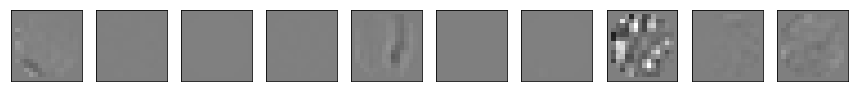

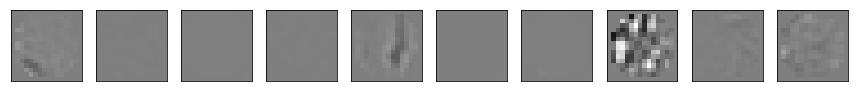

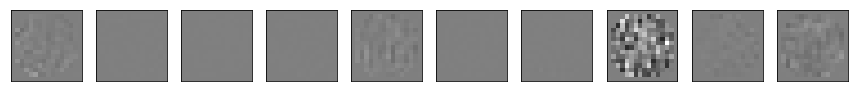

average of data patches =  -0.00019886110837833318 +/- 0.05942785266358504
average of residual patches =  -0.0026972675593439667 +/- 0.02126494518067281
median energy of data =  0.4872344024478701
average energy of data =  0.6038626787030209 +/- 0.5702483495978058
average error =  -0.0026972675593439667 +/- 0.2843707561305558
average energy of residual =  0.21043979353499462 +/- 0.1912827631845053
median energy of residual =  0.17268649807948347
average gain of coding =  3.2639372630936507 +/- 1.4133852613158697


In [11]:
from shl_scripts.shl_encode import mp
nb_quant = 128
record_num_batches = 2048
np.random.seed(1973)
indx = np.random.permutation(data.shape[0])[:record_num_batches]
#sparse_code = shl.code(data, dico, matname=matname)
P_cum_zeroeffect = np.linspace(0, 1, nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))
#P_cum = dico.P_cum
#P_cum = None
l0_sparseness = 200
l0_sparseness = shl.l0_sparseness
for P_cum, gain in zip([None, P_cum_zeroeffect, dico.P_cum], [np.ones(shl.n_dictionary), None, None]):
    print(50*'🐒')
    sparse_code = mp(data[indx, :], dico.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)

    print('number of codes, size of codewords = ', sparse_code.shape)
    print('average of codewords = ', sparse_code.mean())
    print('l0-sparseness of codewords = ', (sparse_code>0).mean(), ' ~= l0/M =', shl.l0_sparseness/shl.n_dictionary)
    print('average energy of codewords = ', sparse_code.std(axis=0).mean())
    print('std of the average of individual patches = ', sparse_code.mean(axis=0).std())

    patches = sparse_code @ dico.dictionary
    print('number of codes, size of reconstructed images = ', patches.shape)

    from shl_scripts.shl_tools import show_data
    max_patches = 10
    fig, axs = show_data(data[indx, :][:max_patches, :])
    plt.show()
    fig, axs = show_data(patches[:max_patches, :])
    plt.show()
    error = data[indx, :] - patches
    fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(error[:max_patches, :])))
    plt.show()
    print('average of data patches = ', data.mean(), '+/-', data.mean(axis=1).std())
    print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
    SD = np.sqrt(np.mean(data[indx, :]**2, axis=1))
    #SD = np.linalg.norm(data[indx, :])/record_num_batches

    print('median energy of data = ', np.median(SD))
    print('average energy of data = ', SD.mean(), '+/-', SD.std())
    #print('total energy of data = ', np.sqrt(np.sum(data**2)))
    #print('total deviation of data = ', np.sum(np.abs(data)))
    print('average error = ', error.mean(), '+/-', error.std())
    SE = np.sqrt(np.mean(error**2, axis=1))
    #SE = np.linalg.norm(error)/record_num_batches

    print('average energy of residual = ', SE.mean(), '+/-', SE.std())
    print('median energy of residual = ', np.median(SE))
    #print('total energy of residual = ', np.sqrt(np.sum(error**2)))
    #print('total deviation of residual = ', np.sum(np.abs(error)))
    print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())

## Shuffling the coefficients

In [12]:
print(sparse_code.shape)

(2048, 324)


In [13]:
help(np.random.shuffle)

Help on built-in function shuffle:

shuffle(...) method of mtrand.RandomState instance
    shuffle(x)
    
    Modify a sequence in-place by shuffling its contents.
    
    This function only shuffles the array along the first axis of a
    multi-dimensional array. The order of sub-arrays is changed but
    their contents remains the same.
    
    Parameters
    ----------
    x : array_like
        The array or list to be shuffled.
    
    Returns
    -------
    None
    
    Examples
    --------
    >>> arr = np.arange(10)
    >>> np.random.shuffle(arr)
    >>> arr
    [1 7 5 2 9 4 3 6 0 8]
    
    Multi-dimensional arrays are only shuffled along the first axis:
    
    >>> arr = np.arange(9).reshape((3, 3))
    >>> np.random.shuffle(arr)
    >>> arr
    array([[3, 4, 5],
           [6, 7, 8],
           [0, 1, 2]])



In [14]:
sparse_code_bar = sparse_code.copy()
#sparse_code_bar = sparse_code_bar.T
np.random.shuffle(sparse_code_bar)
#sparse_code_bar = sparse_code_bar.T
print('average non-zeros', np.count_nonzero(sparse_code_bar, axis=0))
print('average non-zeros', np.count_nonzero(sparse_code, axis=0))

average non-zeros [166 176 201 139 190 164 149 186 201 153 157 149 203 170 181 177 151 120
 214 171 143 194 128 161 217 173 199 186 239 128 212 160 192 186 141 183
 163 230 158 170 219 146 145 192 192 218 216 199 222 187 170 143 279 213
 149 195 245 183 201 166 201 179 250 209 182 179 216 176 177 301 157 246
 211 186 137 141 179 190 214 153 232 231 206 189 144 131 159 151 195 165
 224 209 211 161 184 174 201 141 253 179 189 205 170 163 184 190 193 186
 183 206 137 163 161 170 151 177 266 226 163 186 178 189 181 183 239 177
 169 167 194 177 269 172 220 165 350 200 178 187 164 300 160 155 176 152
 215 200 210 168 184 157 232 222 111 151 150 178 183 172 193 132 173 293
 208 209 199 139 188 182 173 173 193 138 132 189 133 177 316 158 221 152
 123 232 156 188 170 238 181 243 203 181 155 252 231 150 224 190 159 157
 196 196 174 154 181 163 299 220 172 190 155 163 204 138 175 179 241 173
 125 136 248 264 186 146 255 251 156 185 175 209 200 150 246 213 287 155
 154 194 153 151 213 168 164 257 

In [15]:
print(sparse_code_bar.shape)

(2048, 324)


In [16]:
patches_bar = sparse_code_bar @ dico.dictionary
sparse_code_rec = mp(patches_bar, dico.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)

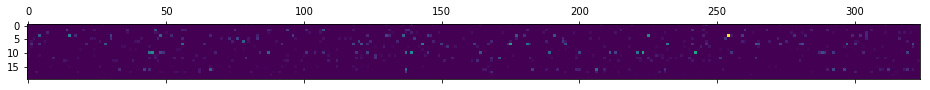

In [17]:
plt.matshow(sparse_code_bar[:20, :])

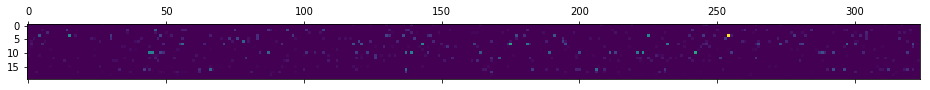

In [18]:
plt.matshow(sparse_code_rec[:20, :])

In [19]:
print('mean deviation of coefficients = ', np.mean(np.abs(sparse_code_rec)))
print('total deviation of coefficients = ', np.mean(np.abs(sparse_code_bar-sparse_code_rec)))

mean deviation of coefficients =  0.11931563114687749
total deviation of coefficients =  0.03320544477426465


In [20]:
from shl_scripts.shl_encode import quantile, rescaling
#sparse_code = mp(data, dico.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum)
stick = np.arange(shl.n_dictionary)*nb_quant
C = 5.
q_rec = quantile(P_cum, rescaling(sparse_code_rec, C=C), stick, do_fast=True)
q_bar = quantile(P_cum, rescaling(sparse_code_bar, C=C), stick, do_fast=True)

In [21]:
print('mean deviation of coefficients = ', np.mean(np.abs(q_bar)))
print('total deviation of coefficients = ', np.mean(np.abs(q_bar-q_rec)))

mean deviation of coefficients =  0.07801681406460377
total deviation of coefficients =  0.018166675985389766


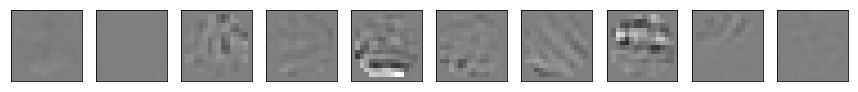

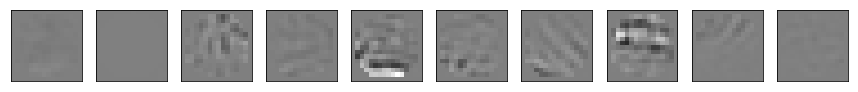

average of data patches =  0.0035159432516474027 +/- 0.05307221151072022
average of residual patches =  -0.00037709040876704686 +/- 0.00834433884529688
median energy of data =  0.44513019303114276
average energy of data =  0.555404290523641 +/- 0.5329497074941058
average energy of residual =  0.07637810166203013 +/- 0.07418151009979798
median energy of residual =  0.058065435842908616
average gain of coding =  9.022268096221826 +/- 5.4975445725839664


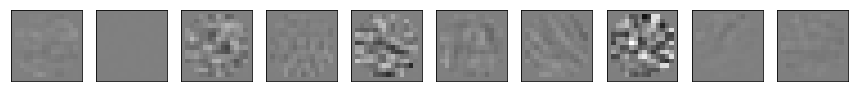

In [22]:
patches_rec = sparse_code_rec @ dico.dictionary
error = patches_bar - patches_rec
fig, axs = show_data(patches_bar[:max_patches, :], cmax=np.max(np.abs(patches_bar[:max_patches, :])))
plt.show()
fig, axs = show_data(patches_rec[:max_patches, :], cmax=np.max(np.abs(patches_bar[:max_patches, :])))
plt.show()
fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(error[:max_patches, :])))
print('average of data patches = ', patches_bar.mean(), '+/-', patches_bar.mean(axis=1).std())
print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
SD = np.sqrt(np.mean(patches_bar**2, axis=1))
print('median energy of data = ', np.median(SD))
print('average energy of data = ', SD.mean(), '+/-', SD.std())

SE = np.sqrt(np.mean(error**2, axis=1))
print('average energy of residual = ', SE.mean(), '+/-', SE.std())
print('median energy of residual = ', np.median(SE))
#print('total energy of residual = ', np.sqrt(np.sum(error**2)))
#print('total deviation of residual = ', np.sum(np.abs(error)))
print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())

## Version used

In [23]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.14.0
shl_scripts 20171221
Wed Feb 07 15:47:24 2018 CET